資料掲載用　グラフ作成

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib import rcParams
import numpy as np
import pandas as pd
# import seaborn as sns

# 読み込むCSVファイル指定(\の代わりに/を使用するか、r"C:\"のようにrをつける)
csv_file = r"E:\_C.elegans\2024-05-07_08\20240507-192521tdTomato-26mW-1\20240507192111\log matching50fps.csv"
# 軌跡用CSVファイルパス
csv_trajectory = r"C:\Users\Mikami\Desktop\.img\20240508-185610tdTomato-10mW-1 good\20240508185004\tra.csv"

軸周り設定
   https://www.yutaka-note.com/entry/matplotlib_axis

### 折れ線グラフ

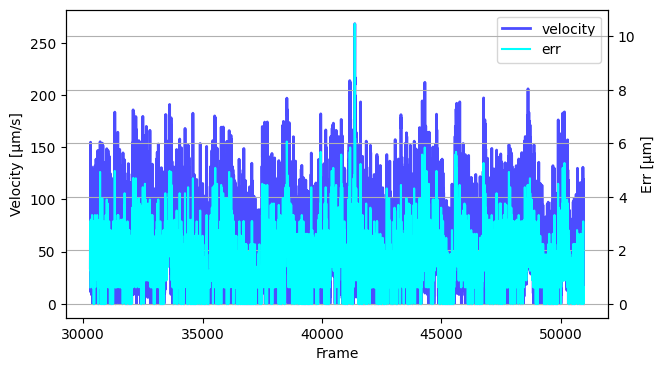

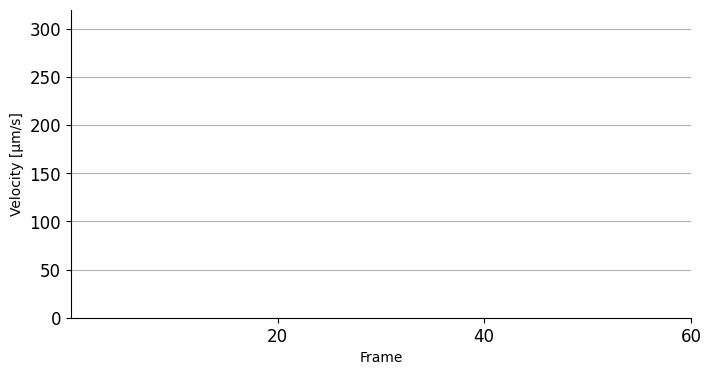

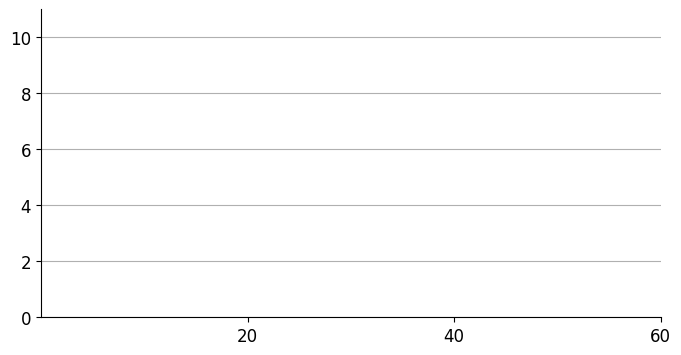

In [3]:
header_num = 0
loop = 10000

csv_f = open(csv_file,"r")

# データの表示範囲指定
csv_df = pd.read_csv(csv_f,header=int(header_num),encoding="shift-jis")             # 始めを設定
# csv_df = pd.read_csv(csv_f,header=int(header_num),nrows=loop,encoding="shift-jis")  # 始めと終わりを設定

# rcParams['pdf.fonttype'] = 42

# データの概要を確認
# print(csv_df.head())

plt.rcParams["figure.figsize"]=(7,4)       # グラフのサイズ
fig = plt.figure(1)
ax1=fig.subplots()
ax2 = ax1.twinx()
x = csv_df[csv_df.columns[0]]               # frame列指定
data_y1 = csv_df[csv_df.columns[6]]         # velocity列指定
data_y2 = csv_df[csv_df.columns[15]]        # error列指定

# plt.title("Plot",fontsize=15)                 # タイトル
ax1.set_xlabel("Frame",fontsize=10)             # x軸ラベル
ax1.set_ylabel("Velocity [µm/s]",fontsize=10)   # y軸ラベル1
ax2.set_ylabel("Err [µm]")                      # y軸ラベル2
ax1.tick_params(labelsize=10)                   # y軸ラベル1サイズ
ax2.tick_params(labelsize=10)                   # y軸ラベル2サイズ
ax1.plot(x, data_y1, linestyle='solid',color="blue",label="velocity",linewidth=2,alpha=0.7) # プロットの設定
ax2.plot(x, data_y2, linestyle='solid',color="cyan",label="err",alpha=1)                    
h1,l1=ax1.get_legend_handles_labels()
h2,l2=ax2.get_legend_handles_labels()
ax1.legend(h1+h2,l1+l2)
plt.grid()

plt.savefig('_mip_plot.pdf')

# ===========================================================================================

plt.rcParams["figure.figsize"]=(8,4)
fig2= plt.figure(2)
ax1=fig2.subplots()
x = csv_df[csv_df.columns[0]]           # frame列指定
data_y1 = csv_df[csv_df.columns[6]]     # velocity列指定 <<<< 変える必要ありかも

# plt.title("Plot",fontsize=15)
ax1.set_xlabel("Frame",fontsize=10)
ax1.set_ylabel("Velocity [µm/s]",fontsize=10)
ax1.tick_params(labelsize=10)
ax1.plot(x, data_y1, linestyle='solid',color="blue",label="velocity",linewidth=2,alpha=0.8)
h1,l1=ax1.get_legend_handles_labels()
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 60)
plt.ylim(0, 320)
plt.xticks(np.arange(20,61,20),fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('_velocity_plot.pdf')

# ===========================================================================================

plt.rcParams["figure.figsize"]=(8,4)
fig3 = plt.figure(3)
ax1=fig3.subplots()
x = csv_df[csv_df.columns[0]]
data_y1 = csv_df[csv_df.columns[15]]

# plt.title("Plot",fontsize=15)
# ax1.set_xlabel("Frame",fontsize=10)
# ax1.set_ylabel("Velocity [µm/s]",fontsize=10)
ax1.tick_params(labelsize=10)
ax1.plot(x, data_y1, linestyle='solid',color="cyan",label="velocity",linewidth=2,alpha=0.8)
h1,l1=ax1.get_legend_handles_labels()
plt.grid(axis='y')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 60)
plt.ylim(0, 11)
plt.xticks(np.arange(20,61,20),fontsize=12)
plt.yticks(fontsize=12)


plt.savefig('_eroor_plot.pdf')
plt.show()

##### 速度折れ線グラフの動画

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

# CSVファイルからデータを読み込む
csv_file = r"E:\0307_0308_c.elegans\3.5%_M9_NeuroPAL\20240308174500\Results.csv"
df = pd.read_csv(csv_file)
time_points = df['Time'].values
data_points = df['Value'].values

# グラフ全体を表示
fig, ax = plt.subplots()
line, = ax.plot(time_points, data_points, color='blue')
ax.set_xlim(min(time_points), max(time_points))
ax.set_ylim(min(data_points), max(data_points))

# 右と上の枠線をなくす
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 軸の名前を設定
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [µm/sec]')

# Valueを右上に表示
value_text = ax.text(0.05, 0.95, f'Velocity: {data_points[0]:.2f}',
                     transform=ax.transAxes, ha='left', va='top', color='red')

# 現在時刻の点を強調表示するためのプロット
highlight_point, = ax.plot(time_points[0], data_points[0], 'ro', markersize=8)

# 動画ファイルの設定
video_path = 'output_video3.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(video_path, fourcc, 10, (640, 480))

# 初期のフレームを描画して動画に追加
fig.canvas.draw()
img = np.array(fig.canvas.renderer.buffer_rgba())
img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
video_writer.write(img)

# 残りのフレームを作成して動画に追加
for i in range(1, len(time_points)):
    # Valueを更新して表示
    value_text.set_text(f'Velocity: {data_points[i]:.2f}')

    # 現在時刻の点を更新
    highlight_point.set_data([time_points[i]], [data_points[i]])

    # グラフを画像に変換
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer.buffer_rgba())

    # BGRに変換
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)

    # 動画に追加
    video_writer.write(img)

# 動画ファイルを閉じる
video_writer.release()

# グラフを閉じる
plt.close()

print("finish")

### 軌跡 

        x       y
0  0.0000  0.0000
1 -2.5122 -2.3850
2 -5.0244 -4.8018
3 -7.4571 -6.3441
4 -9.6672 -6.6780


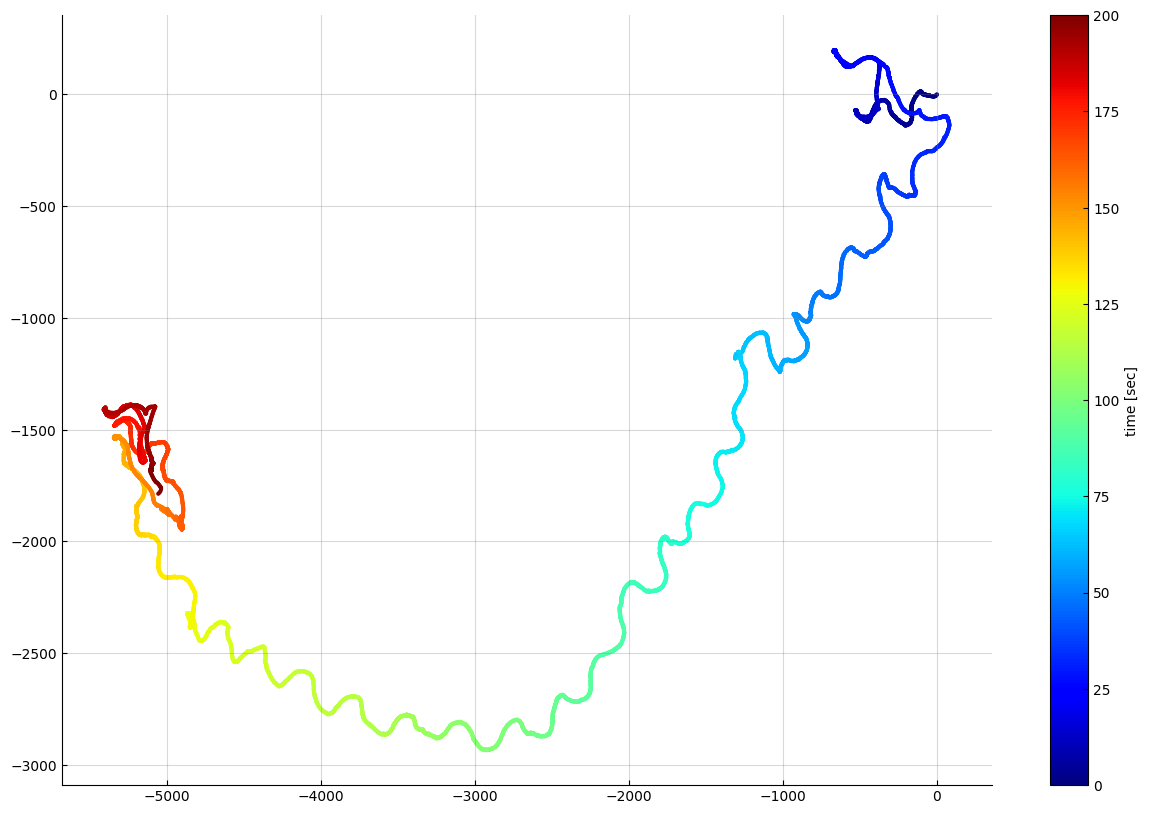

In [11]:
t = np.linspace(0,200,9996) # カラーマップと使用データ数設定

df = pd.read_csv(csv_trajectory,encoding="utf-8")

# データの概要を確認
print(df.head())

plb.rcParams['xtick.direction'] = 'in'  # メモリの向き in：内向き、out：外向き
plb.rcParams['ytick.direction'] = 'in' 

# 散布図を作成
plb.figure(figsize=(15, 10))          # グラフのサイズを設定
plb.scatter(df['x'], df['y'], c=t,  # 色と時系列の対応
            cmap=cm.jet,            # カラーマップの種類
            marker='.',lw=0)

# plt.xlim(-3500, 500)      # x軸の表示範囲指定
# plt.ylim(0, 6000)         # y軸の表示範囲指定

# plt.xticks([-3000,-2000,-1000,0],fontsize=15)                 # x軸のメモリ設定
# plt.yticks([0,1000,2000,3000,4000,5000,6000],fontsize=15)     # y軸のメモリ設定

plb.gca().spines['right'].set_visible(False)    # グラフの枠 False：非表示
plb.gca().spines['top'].set_visible(False)

ax=plb.colorbar()           #カラーマップの凡例
ax.set_label('time [sec]')  #カラーバーのラベルネーム


plb.grid(color="gray",alpha=0.3)    # グリッドを表示

# plt.savefig('trajectory.pdf', format='pdf')    # グラフの保存
# plt.savefig('trajectory.svg', format='svg')

plb.show()  # グラフを表示


### 散布図

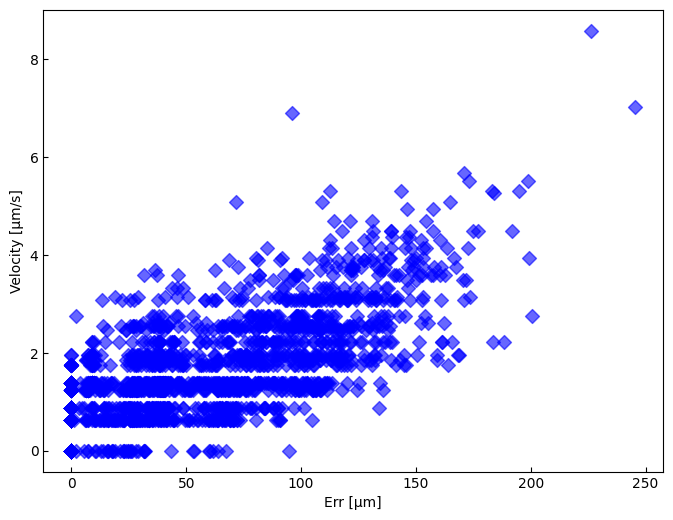

In [19]:
csv_f = open(csv_file,"r")
csv_df = pd.read_csv(csv_f,header=int(header_num),nrows=loop,encoding="shift-jis")

plt.rcParams["figure.figsize"]=(8,6)

data_y1 = csv_df[csv_df.columns[6]]
data_y2 = csv_df[csv_df.columns[15]]

# plt.title("Correlation",fontsize=15)
plt.xlabel("Err [µm]",fontsize=10)
plt.ylabel("Velocity [µm/s]",fontsize=10)
plt.tick_params(labelsize=10)
plt.scatter(data_y1, data_y2,s=50,c="blue",marker="D",alpha=0.6)
# plt.grid()
plt.show()

### 箱ひげ図

    velocity     error
0  28.764980  1.948886
1  55.685693  1.948886
2  40.652896  1.743137
3  56.584007  2.222072
4  73.540501  2.222072


C:\Users\Hikaru Shishido\AppData\Local\Temp\ipykernel_22380\3199606181.py:24: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.boxplot(x='Threshold Group', y=df.columns[1], data=df, color="blue",hue='Threshold Group', legend=False)


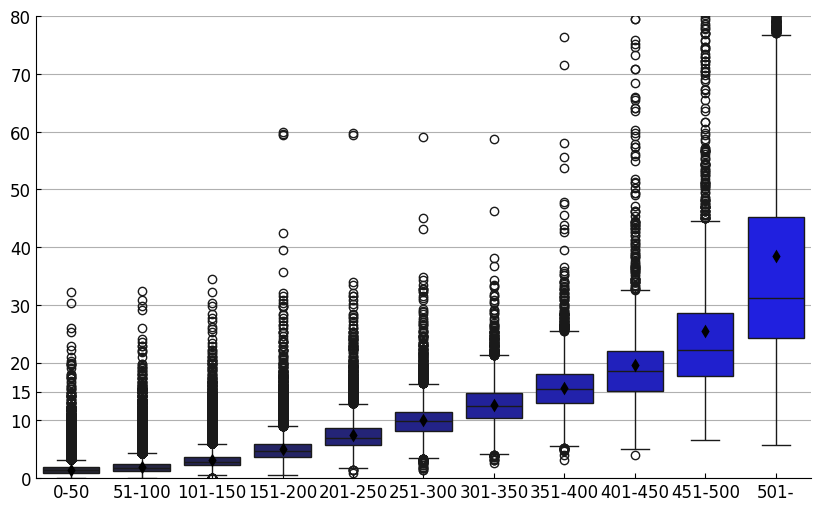

In [8]:
# CSVファイルからデータを読み込む
csv_file_path = r"C:\Users\Hikaru Shishido\Desktop\北大_修士\M1交流会\data\histgram2.csv"
df = pd.read_csv(csv_file_path)
# データの概要を確認
print(df.head())


# 一列目の値に基づいて閾値的にグループ分け
thresholds = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]  # 適宜閾値を設定
label = ['0-50', '51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500','501-']
df['Threshold Group'] = pd.cut(df[df.columns[0]], bins=thresholds, labels=label)
grouped_means = df.groupby('Threshold Group', observed=False)[df.columns[1]].mean().reset_index()


# 箱ひげ図の描画
plt.figure(figsize=(10, 6))  # 図のサイズ
# plt.xlim(-3500, 500)
plt.xticks(fontsize=12)
plt.ylim(0, 80)
# plt.yticks(np.arange(0, 81, 5))
plt.yticks([0,10,15,20,30,40,50,60,70,80],fontsize=12)

# sns.boxplot(x='Threshold Group', y=df.columns[1], data=df, palette='Set3',hue='Threshold Group', legend=False)
sns.boxplot(x='Threshold Group', y=df.columns[1], data=df, color="blue",hue='Threshold Group', legend=False)

# 各箱ひげ図の中央に平均値を表示
sns.swarmplot(x='Threshold Group', y=df.columns[1], data=grouped_means, color='black', size=7, marker="d", legend=False)

plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(axis="y")

# plt.show()
plt.savefig('example.svg', format='svg')

### ヒストグラム

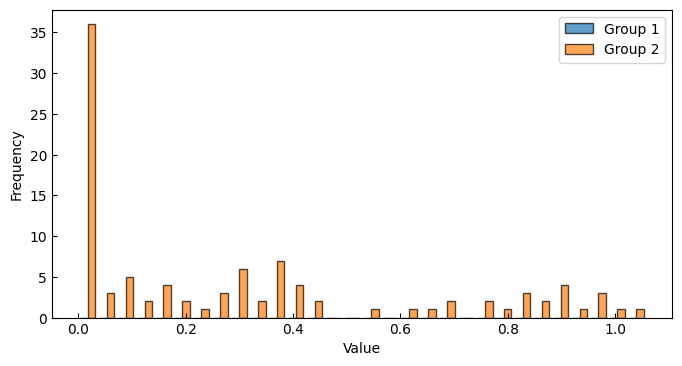

In [12]:
csv_f = open(csv_file,"r")
csv_df = pd.read_csv(csv_f,header=int(header_num),nrows=loop,encoding="shift-jis")

data = csv_df[csv_df.columns[6]]

# 閾値の設定
threshold = -1

# 閾値を基準にデータを分割
group1 = data[data <= threshold]
group2 = data[data > threshold]

# ヒストグラムの作成
plt.hist([group1, group2], bins=30, edgecolor='black', label=['Group 1', 'Group 2'], alpha=0.7)

# グラフの装飾
# plt.title('Histogram with Threshold')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# ヒストグラムの表示
plt.show()
